In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from math import exp, sqrt
import matplotlib.pyplot as plt

In [6]:
msft = yf.Ticker("MSFT")
hist = msft.history(period="5d")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-15 00:00:00-04:00,308.425773,309.224016,306.919057,308.784973,16336500,0.00,0.0
2023-05-16 00:00:00-04:00,309.154160,313.025702,309.154160,311.059998,26730300,0.00,0.0
2023-05-17 00:00:00-04:00,312.290009,314.429993,310.739990,314.000000,24315000,0.68,0.0
2023-05-18 00:00:00-04:00,314.529999,319.040009,313.720001,318.519989,27276000,0.00,0.0
2023-05-19 00:00:00-04:00,316.739990,318.750000,316.369995,318.339996,27529500,0.00,0.0


In [11]:
# multiple tickers
data = yf.download("SPY AAPL MSFT", start="2017-01-01", end="2021-04-30")

[*********************100%***********************]  3 of 3 completed


In [12]:
data = yf.download(
    "SPY AAPL MSFT", start="2017-01-01", end="2021-04-30", group_by="ticker"
)
spy_price = data["SPY"]["Adj Close"]

[*********************100%***********************]  3 of 3 completed


In [13]:
hist = yf.download("MSFT", start="2010-01-01", end="2020-01-01")
msft_daily_returns = (hist["Adj Close"] / hist["Adj Close"].shift(1)) - 1
msft_daily_returns_frame = msft_daily_returns.to_frame()

[*********************100%***********************]  1 of 1 completed


In [14]:
from scipy.stats import kurtosis, skew

array_msft = msft_daily_returns.to_numpy()
kurt = kurtosis(array_msft[1:])
sk = skew(array_msft[1:])
print("Kurtosis = " + str(kurt))
print("Skew = " + str(sk))

Kurtosis = 6.280220404298813
Skew = 0.07075599109089765


In [17]:
# We first need to get rid of the NaN values
msft_ret = msft_daily_returns_frame.dropna()

# Then, we perform the test
jb_msft = stats.jarque_bera(msft_ret)
jb_msft
# p value less than critical, reject null that it is normal

Jarque_beraResult(statistic=4135.204284528979, pvalue=0.0)

In [18]:
stats.ttest_1samp(msft_ret, popmean=0)
# reject null and we conclude that mean of the distribution is statistically different than Zero

Ttest_1sampResult(statistic=array([2.9616121]), pvalue=array([0.003089]))

In [21]:
# Covariance between AAPL and MSFT in the 2016-2020 period:
hist_AAPL = yf.download("AAPL", start="2016-01-01", end="2020-12-31")
aapl_daily_returns = (hist_AAPL["Adj Close"] / hist_AAPL["Adj Close"].shift(1)) - 1
hist_MSFT = yf.download("MSFT", start="2016-01-01", end="2020-12-31")
msft_daily_returns = (hist_MSFT["Adj Close"] / hist_MSFT["Adj Close"].shift(1)) - 1
X = np.stack((msft_daily_returns.dropna(), aapl_daily_returns.dropna()), axis=0)
Cov_1 = np.cov(X)
print("Covariance for AAPL-MSFT for 2016-2020 is: ", Cov_1[0, 1])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Covariance for AAPL-MSFT for 2016-2020 is:  0.00023742435956860487


In [24]:
tickers = ["AAPL", "AMZN", "META", "GOOG", "MSFT"]
df_tickers = yf.download(tickers, period="10y")["Adj Close"]
df_tickers.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2013-05-20,13.733947,13.3815,22.628433,25.760000,29.232710
2013-05-21,13.632554,13.4430,22.589579,25.660000,29.041033
2013-05-22,13.684956,13.1480,22.152468,25.160000,28.841059
2013-05-23,13.709452,13.0900,21.987335,25.059999,28.457735
2013-05-24,13.802785,13.0870,21.751471,24.309999,28.557722


In [25]:
df_tickers_ret = df_tickers / df_tickers.shift(1) - 1
volatility = (
    df_tickers_ret.std()
)  # This is daily volatility, we will later on annualize it!
df_tickers_corr = df_tickers_ret.corr()
print(df_tickers_corr)
# all of positive returns

          AAPL      AMZN      GOOG      META      MSFT
AAPL  1.000000  0.532780  0.589479  0.495534  0.644550
AMZN  0.532780  1.000000  0.642824  0.554196  0.610049
GOOG  0.589479  0.642824  1.000000  0.609228  0.698239
META  0.495534  0.554196  0.609228  1.000000  0.521314
MSFT  0.644550  0.610049  0.698239  0.521314  1.000000


### Cholesky decomposition

### C = LL^T

In [26]:
R = np.linalg.cholesky(df_tickers_corr)

In [30]:
L = R

In [32]:
print(df_tickers_corr)
print("\n below I am showing that we can obtain this original matrix using cholesky decomposition matrix\n")
re_mat = np.dot(L,L.T)
print(re_mat)

          AAPL      AMZN      GOOG      META      MSFT
AAPL  1.000000  0.532780  0.589479  0.495534  0.644550
AMZN  0.532780  1.000000  0.642824  0.554196  0.610049
GOOG  0.589479  0.642824  1.000000  0.609228  0.698239
META  0.495534  0.554196  0.609228  1.000000  0.521314
MSFT  0.644550  0.610049  0.698239  0.521314  1.000000

 below I am showing that we can obtain this original matrix using cholesky decomposition matrix

[[1.         0.53278007 0.58947861 0.4955336  0.64454963]
 [0.53278007 1.         0.6428239  0.55419603 0.61004922]
 [0.58947861 0.6428239  1.         0.60922844 0.6982386 ]
 [0.4955336  0.55419603 0.60922844 1.         0.52131355]
 [0.64454963 0.61004922 0.6982386  0.52131355 1.        ]]


### Simulating correlated paths for these 4 stocks based on their correlation

In [33]:
volatility

AAPL    0.018012
AMZN    0.020729
GOOG    0.017451
META    0.024540
MSFT    0.017236
dtype: float64

In [46]:
T = 252 # Number of simulated days
Num = len(volatility)  
stock_price_array = np.full(
    (Num, T), 100.0
)  # Stock price, first value is simulation input
volatility_array = volatility * sqrt(252)  # Volatility (annual, 0.01=1%)
r = 0.001  # Risk-free rate (annual, 0.01=1%)
dt = 1.0 / T  # Time increment (annualized)

In [47]:
# we can simulate the price using the straight forward equation St = st-1*exp((r-sigma^2/2)*dt + sigma*epsilon*sqrt(dt))
for t in range(1, T):
    # Generate array of random standard normal draws
    random_array = np.random.standard_normal(Num)

    # Multiply R (from factorization) with random_array to obtain correlated epsilons
    epsilon_array = np.inner(random_array, R)

    # Sample price path per stock
    for n in range(Num):
        dt = 1 / T
        S = stock_price_array[n, t - 1]
        v = volatility_array[n]
        epsilon = epsilon_array[n]

        # Generate new stock price
        stock_price_array[n, t] = S * exp(
            (r - 0.5 * v**2) * dt + v * sqrt(dt) * epsilon
        )

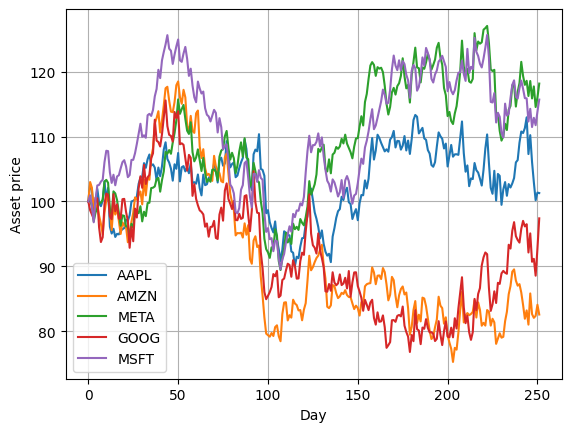

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
array_day_plot = [t for t in range(T)]

for n in range(Num):
    ax.plot(array_day_plot, stock_price_array[n], label="{}".format(tickers[n]))

plt.grid()
plt.xlabel("Day")
plt.ylabel("Asset price")
plt.legend(loc="best")

plt.show()

In [72]:
nl = np.array([[0.063, -0.025],[-0.025, 0.032]])

In [73]:
np.linalg.cholesky(nl)

array([[ 0.25099801,  0.        ],
       [-0.09960238,  0.14859127]])

In [82]:
hist = yf.download("AMZN", start="2021-01-01", end="2021-12-31")
# tsla_daily_returns = (hist["Adj Close"] / hist["Adj Close"].shift(1)) - 1

[*********************100%***********************]  1 of 1 completed


In [83]:
hist.to_clipboard()

In [55]:
tickers = ["AAPL", "AMZN", "TSLA"]
df_tickers = yf.download(tickers, start="2021-01-01", end="2021-7-31")["Adj Close"]
df_tickers.to_clipboard()

[*********************100%***********************]  3 of 3 completed


In [75]:
corr = np.array([[1, 0.679, 0.338], [0.679,1,0.435], [0.338, 0.435,1]])

In [76]:
np.random.seed(10)
R = np.linalg.cholesky(corr)
random_array = np.random.standard_normal(3)
epsilon_array = np.inner(random_array, R)

In [77]:
epsilon_array

array([ 1.3315865 ,  1.42926091, -0.73833301])

In [63]:
tick = ["JPM", "BA"]
hist = yf.download(tick, start="2008-01-01", end="2011-12-31")

[*********************100%***********************]  2 of 2 completed


In [64]:
hist.to_clipboard()

In [84]:
L = np.array([[0.3, 0],[-0.25, 0.32]])

In [85]:
np.dot(L,L.T)

array([[ 0.09  , -0.075 ],
       [-0.075 ,  0.1649]])